# Lab | Data Cleaning and Formatting

In this lab, we will be working with the customer data from an insurance company, which can be found in the CSV file located at the following link: https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv


# Challenge 1: Data Cleaning and Formatting

## Exercise 1: Cleaning Column Names

To ensure consistency and ease of use, standardize the column names of the dataframe. Start by taking a first look at the dataframe and identifying any column names that need to be modified. Use appropriate naming conventions and make sure that column names are descriptive and informative.

*Hint*:
- *Column names should be in lower case*
- *White spaces in column names should be replaced by `_`*
- *`st` could be replaced for `state`*

In [7]:
import pandas as pd
import numpy as np
data = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv')
data

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Column names should be in lower case
cols = []
for colname in data.columns:
    cols.append(colname.lower())
data.columns = cols
# White spaces in column names should be replaced by _
data.columns = data.columns.str.replace(" ", "_")
# st could be replaced for state
data = data.rename(columns = {'st':'state'})
data

# alternative solutions:
# data.columns = data.columns.str.lower().str.replace(" " , "_")
# data

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exercise 2: Cleaning invalid Values

The dataset contains columns with inconsistent and incorrect values that could affect the accuracy of our analysis. Therefore, we need to clean these columns to ensure that they only contain valid data.

Note that this exercise will focus only on cleaning inconsistent values and will not involve handling null values (NaN or None).

*Hint*:
- *Gender column contains various inconsistent values such as "F", "M", "Femal", "Male", "female", which need to be standardized, for example, to "M" and "F".*
- *State abbreviations be can replaced with its full name, for example "AZ": "Arizona", "Cali": "California", "WA": "Washington"*
- *In education, "Bachelors" could be replaced by "Bachelor"*
- *In Customer Lifetime Value, delete the `%` character*
- *In vehicle class, "Sports Car", "Luxury SUV" and "Luxury Car" could be replaced by "Luxury"*

In [9]:
# Gender column contains various inconsistent values such as "F", "M", "Femal", "Male", "female", which need to be standardized, for example, to "M" and "F".

data['gender'] = data['gender'].replace({ 
    'Female': 'F',
    'female': 'F',
    'Male': 'M',
    'Femal': 'F',
})

data['gender'].value_counts(dropna=False)


# State abbreviations be can replaced with its full name, for example "AZ": "Arizona", "Cali": "California", "WA": "Washington"
data['state']= data['state'].replace({"AZ": "Arizona", "Cali": "California", "WA": "Washington"})
data['state'].value_counts()


# # In education, "Bachelors" could be replaced by "Bachelor"
data['education']= data['education'].replace({"Bachelors" : "Bachelor"})
data['education'].value_counts()

# # In Customer Lifetime Value, delete the % character
data['customer_lifetime_value'] = data['customer_lifetime_value'].str.replace('%','').astype(float)/100

# # In vehicle class, "Sports Car", "Luxury SUV" and "Luxury Car" could be replaced by "Luxury"
data['vehicle_class']= data['vehicle_class'].replace({"Sports Car":"Luxury", "Luxury SUV":"Luxury", "Luxury Car":"Luxury"})
data['vehicle_class'].value_counts()



Four-Door Car    576
Two-Door Car     205
SUV              199
Luxury            91
Name: vehicle_class, dtype: int64

## Exercise 3: Formatting data types

The data types of many columns in the dataset appear to be incorrect. This could impact the accuracy of our analysis. To ensure accurate analysis, we need to correct the data types of these columns. Please update the data types of the columns as appropriate.

It is important to note that this exercise does not involve handling null values (NaN or None).

*Hint*:
- *Customer lifetime value should be numeric*
- *Number of open complaints has an incorrect format. Look at the different values it takes with `unique()` and take the middle value. As an example, 1/5/00 should be 5. Number of open complaints is a string - remember you can use `split()` to deal with it and take the number you need. Finally, since it should be numeric, cast the column to be in its proper type.*

In [10]:
# data.dtypes
# Look at the different values it takes with unique() and take the middle value. As an example, 1/5/00 should be 5. Number of open complaints is a string - remember you can use split() to deal with it and take the number you need. Finally, since it should be numeric, cast the column to be in its proper type
data['number_of_open_complaints'].unique()

# data['number_of_open_complaints'].str.split('/',1).astype(int)
data['number_of_open_complaints'] = data['number_of_open_complaints'].str.split('/').str[1].fillna(0).astype(int)
data['number_of_open_complaints'].dtypes 

dtype('int64')


## Exercise 4: Dealing with Null values

Identify any columns with null or missing values. Identify how many null values each column has. You can use the `isnull()` function in pandas to find columns with null values.

Decide on a strategy for handling the null values. There are several options, including:

- Drop the rows or columns with null values
- Fill the null values with a specific value (such as the column mean or median for numerical variables, and mode for categorical variables)
- Fill the null values with the previous or next value in the column
- Fill the null values based on a more complex algorithm or model (note: we haven't covered this yet)

Implement your chosen strategy to handle the null values. You can use the `fillna()` function in pandas to fill null values or `dropna()` function to drop null values.

Verify that your strategy has successfully handled the null values. You can use the `isnull()` function again to check if there are still null values in the dataset.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling null values.

After formatting data types, as a last step, convert all the numeric variables to integers using `applymap()`.

In [18]:
# find columns with null values
data.isnull()
data.isna().sum()
# drop all na data.

df = data.copy()
df = df[df['gender'].isna()==False]
df = df[df['customer_lifetime_value'].isna()==False]

df.isna().sum()
df

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
1,QZ44356,Arizona,F,Bachelor,6979.5359,0.0,94.0,0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,12887.4317,48767.0,108.0,0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,7645.8618,0.0,106.0,0,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,5363.0765,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323
5,OC83172,Oregon,F,Bachelor,8256.2978,62902.0,69.0,0,Personal Auto,Two-Door Car,159.383042
...,...,...,...,...,...,...,...,...,...,...,...
1066,TM65736,Oregon,M,Master,3059.5503,38644.0,78.0,1,Personal Auto,Four-Door Car,361.455219
1067,VJ51327,California,F,High School or Below,20314.9976,63209.0,102.0,2,Personal Auto,SUV,207.320041
1068,GS98873,Arizona,F,Bachelor,3239.1247,16061.0,88.0,0,Personal Auto,Four-Door Car,633.600000
1069,CW49887,California,F,Master,4626.8011,79487.0,114.0,0,Special Auto,SUV,547.200000


#### Exercise 5: Dealing with duplicates

Use the `.duplicated()` method to identify any duplicate rows in the dataframe.

Decide on a strategy for handling the duplicates. Options include:
- Dropping all duplicate rows
- Keeping only the first occurrence of each duplicated row
- Keeping only the last occurrence of each duplicated row
- Dropping duplicates based on a subset of columns
- Dropping duplicates based on a specific column

Implement your chosen strategy using the `drop_duplicates()` function.

Verify that your strategy has successfully handled the duplicates by checking for duplicates again using `.duplicated()`.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling duplicates.

Save the cleaned dataset to a new CSV file.

*Hint*: *after dropping duplicates, reset the index to ensure consistency*.

In [23]:
df[df.duplicated()==True]
df.to_csv('my_cleaned_dataset.csv', index=False)

# Bonus: Challenge 2: creating functions on a separate `py` file

Put all the data cleaning and formatting steps into functions, and create a main function that performs all the cleaning and formatting.

Write these functions in separate .py file(s). By putting these steps into functions, we can make the code more modular and easier to maintain.

*Hint: autoreload module is a utility module in Python that allows you to automatically reload modules in the current session when changes are made to the source code. This can be useful in situations where you are actively developing code and want to see the effects of changes you make without having to constantly restart the Python interpreter or Jupyter Notebook kernel.*

In [ ]:
# Your code here

# Bonus: Challenge 3: Analyzing Clean and Formated Data

You have been tasked with analyzing the data to identify potential areas for improving customer retention and profitability. Your goal is to identify customers with a high policy claim amount and a low customer lifetime value.

In the Pandas Lab, we only looked at high policy claim amounts because we couldn't look into low customer lifetime values. If we had tried to work with that column, we wouldn't have been able to because customer lifetime value wasn't clean and in its proper format. So after cleaning and formatting the data, let's get some more interesting insights!

Instructions:

- Review the statistics again for total claim amount and customer lifetime value to gain an understanding of the data.
- To identify potential areas for improving customer retention and profitability, we want to focus on customers with a high policy claim amount and a low customer lifetime value. Consider customers with a high policy claim amount to be those in the top 25% of the total claim amount, and clients with a low customer lifetime value to be those in the bottom 25% of the customer lifetime value. Create a pandas DataFrame object that contains information about customers with a policy claim amount greater than the 75th percentile and a customer lifetime value in the bottom 25th percentile.
- Use DataFrame methods to calculate summary statistics about the high policy claim amount and low customer lifetime value data. To do so, select both columns of the dataframe simultaneously and pass it to the `.describe()` method. This will give you descriptive statistics, such as mean, median, standard deviation, minimum and maximum values for both columns at the same time, allowing you to compare and analyze their characteristics.

In [ ]:
# Your code here


## Lab | Customer Analysis Round 3
Get the data

For this lab, we will continue using the csv file that was downloaded in the previous lab as well as the Jupyter Notebook.
There is NO NEED to fork and clone this repository.

EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:
Show DataFrame info.
Describe DataFrame.
Show a plot of the Gender breakdown.
Show a plot of Income by State.
Show a plot of the Policy Type by the Total Claim Amount.
Show a plot of the Education by Vehicle Class.
What insights can you establish from these plots?
What other plots do you feel would be beneficial?

In [28]:
c_df = pd.read_csv('my_cleaned_dataset.csv')
c_df # Show DataFrame info.
c_df.describe().T # Describe DataFrame.


,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,QZ44356,Arizona,F,Bachelor,6979.5359,0.0,94.0,0,Personal Auto,Four-Door Car,1131.464935
1,AI49188,Nevada,F,Bachelor,12887.4317,48767.0,108.0,0,Personal Auto,Two-Door Car,566.472247
2,WW63253,California,M,Bachelor,7645.8618,0.0,106.0,0,Corporate Auto,SUV,529.881344
3,GA49547,Washington,M,High School or Below,5363.0765,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323
4,OC83172,Oregon,F,Bachelor,8256.2978,62902.0,69.0,0,Personal Auto,Two-Door Car,159.383042
...,...,...,...,...,...,...,...,...,...,...,...
947,TM65736,Oregon,M,Master,3059.5503,38644.0,78.0,1,Personal Auto,Four-Door Car,361.455219
948,VJ51327,California,F,High School or Below,20314.9976,63209.0,102.0,2,Personal Auto,SUV,207.320041
949,GS98873,Arizona,F,Bachelor,3239.1247,16061.0,88.0,0,Personal Auto,Four-Door Car,633.600000
950,CW49887,California,F,Master,4626.8011,79487.0,114.0,0,Special Auto,SUV,547.200000


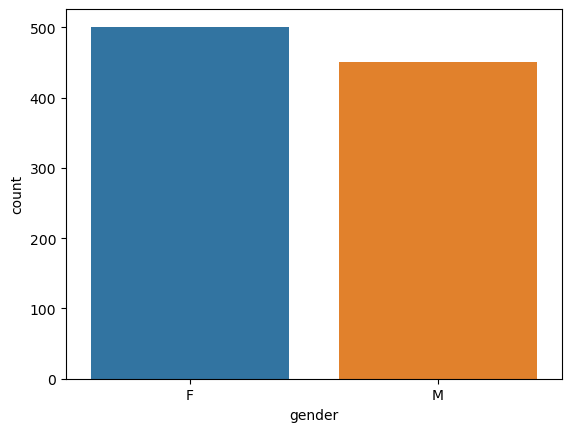

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns 

# Show a plot of the Gender breakdown.
sns.countplot(x="gender", data=c_df)
plt.show()


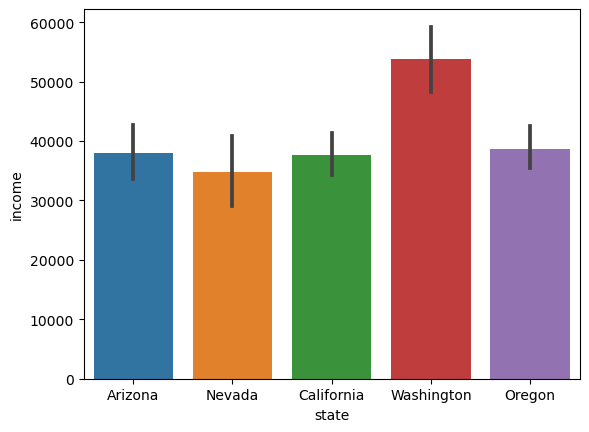

In [34]:
# Show a plot of Income by State.
sns.barplot(x="state", y="income", data=c_df)
plt.show()

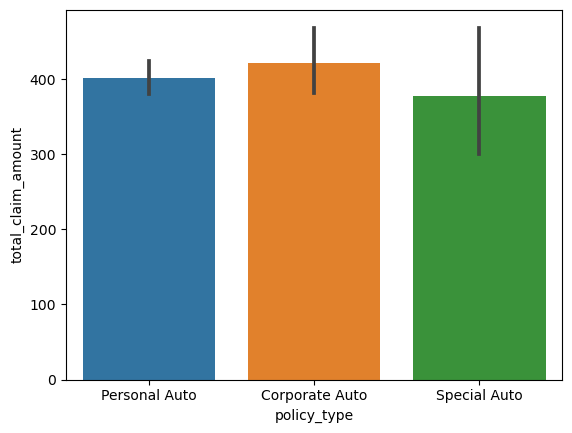

In [35]:
# Show a plot of the Policy Type by the Total Claim Amount.
sns.barplot(x="policy_type", y="total_claim_amount", data=c_df)
plt.show()

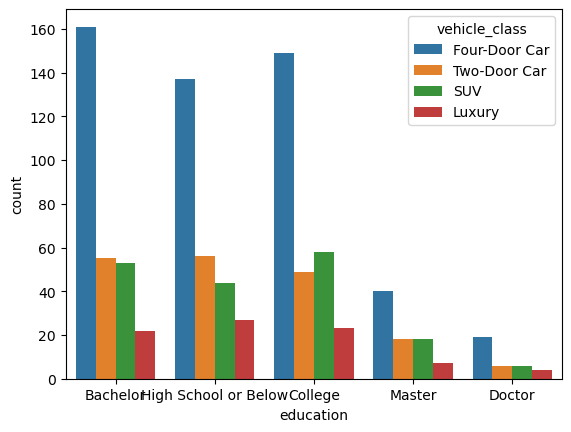

In [38]:
# Show a plot of the Education by Vehicle Class.
sns.countplot(data=c_df, x='education', hue='vehicle_class')
plt.show()

In [ ]:
# What insights can you establish from these plots?
# 1. Most customers are female
# 2.Washington has the most income
# 3.Policy type corporate auto has the most claim amount.
# 4. Four-Door Car is the most popular among all kinds of education background

# What other plots do you feel would be beneficial?
# Scatter Plot and heatmap could give us more insights on correlations

# Round 4

- Check the data types of the columns. Get the numeric data into a dataframe called `numerical` and categorical columns in a dataframe called `categorical`.
(You can use np.number and object to select the numerical data types and categorical data types respectively)
- Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms
  - Do the distributions for different numerical variables look like a normal distribution?
- For the numerical variables, check the multicollinearity between the features. **Please note** that we will use the column `total_claim_amount` later as the target variable. 
- Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features


In [43]:
n_df = pd.read_csv('my_cleaned_dataset.csv')
n_df.info()
# Check the data types of the columns
n_df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer                   952 non-null    object 
 1   state                      952 non-null    object 
 2   gender                     952 non-null    object 
 3   education                  952 non-null    object 
 4   customer_lifetime_value    952 non-null    float64
 5   income                     952 non-null    float64
 6   monthly_premium_auto       952 non-null    float64
 7   number_of_open_complaints  952 non-null    int64  
 8   policy_type                952 non-null    object 
 9   vehicle_class              952 non-null    object 
 10  total_claim_amount         952 non-null    float64
dtypes: float64(4), int64(1), object(6)
memory usage: 81.9+ KB


customer                      object
state                         object
gender                        object
education                     object
customer_lifetime_value      float64
income                       float64
monthly_premium_auto         float64
number_of_open_complaints      int64
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object

In [47]:
# Get the numeric data into a dataframe called numerical and categorical columns in a dataframe called categorical.
n_df_num = n_df.select_dtypes(include = np.number)
n_df_num
n_df_cat = n_df.select_dtypes(include = object)
n_df_cat

,customer,state,gender,education,policy_type,vehicle_class
0,QZ44356,Arizona,F,Bachelor,Personal Auto,Four-Door Car
1,AI49188,Nevada,F,Bachelor,Personal Auto,Two-Door Car
2,WW63253,California,M,Bachelor,Corporate Auto,SUV
3,GA49547,Washington,M,High School or Below,Personal Auto,Four-Door Car
4,OC83172,Oregon,F,Bachelor,Personal Auto,Two-Door Car
...,...,...,...,...,...,...
947,TM65736,Oregon,M,Master,Personal Auto,Four-Door Car
948,VJ51327,California,F,High School or Below,Personal Auto,SUV
949,GS98873,Arizona,F,Bachelor,Personal Auto,Four-Door Car
950,CW49887,California,F,Master,Special Auto,SUV


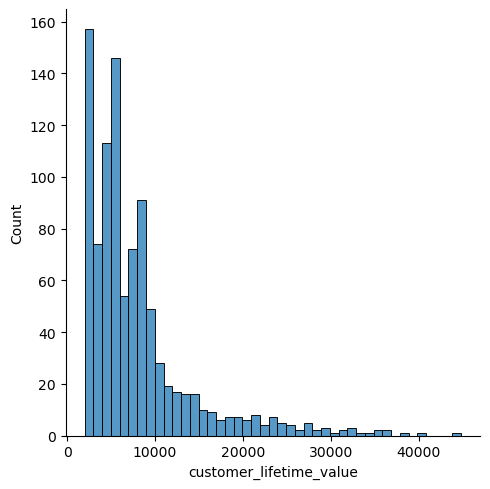

In [51]:
# check the normality of the numerical variables visually
sns.displot(n_df_num[n_df_num.columns[0]])
plt.show()
# not a normal distribution

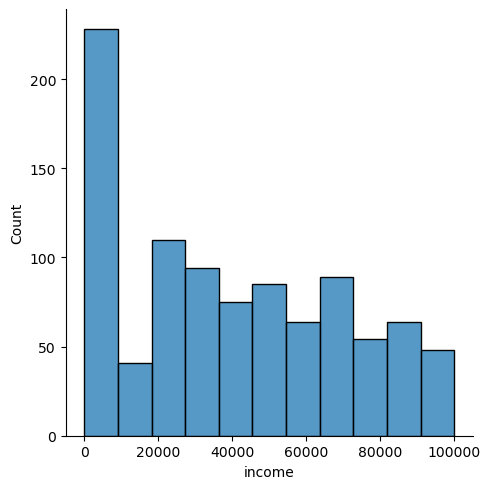

In [52]:
sns.displot(n_df_num[n_df_num.columns[1]])
plt.show()

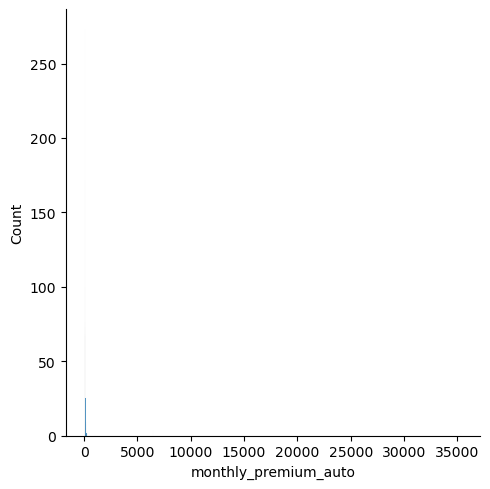

In [59]:
sns.displot(n_df_num[n_df_num.columns[2]])
plt.show()
# not a normal distribution since it's not symmetry and bell-shaped.

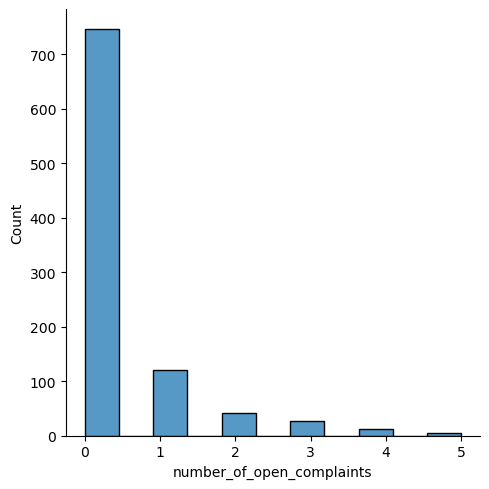

In [54]:
sns.displot(n_df_num[n_df_num.columns[3]])
plt.show()
# not a normal distribution

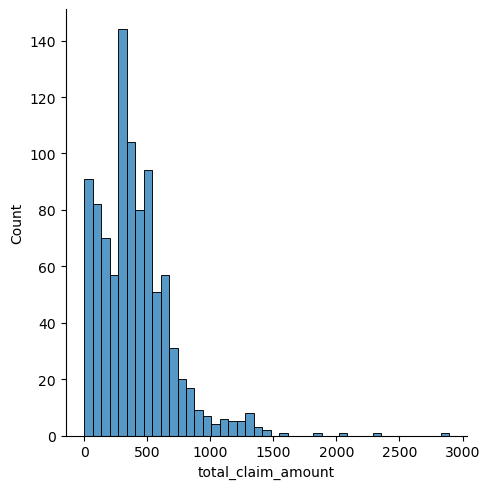

In [55]:
sns.displot(n_df_num[n_df_num.columns[4]])
plt.show()
# not a normal distribution

In [64]:
# For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
correlations_matrix = n_df_num.corr()
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,total_claim_amount
customer_lifetime_value,1.000000,0.030614,0.004180,-0.029041,0.139519
income,0.030614,1.000000,0.051882,-0.008396,-0.366088
monthly_premium_auto,0.004180,0.051882,1.000000,0.028586,-0.041990
number_of_open_complaints,-0.029041,-0.008396,0.028586,1.000000,0.015595
total_claim_amount,0.139519,-0.366088,-0.041990,0.015595,1.000000


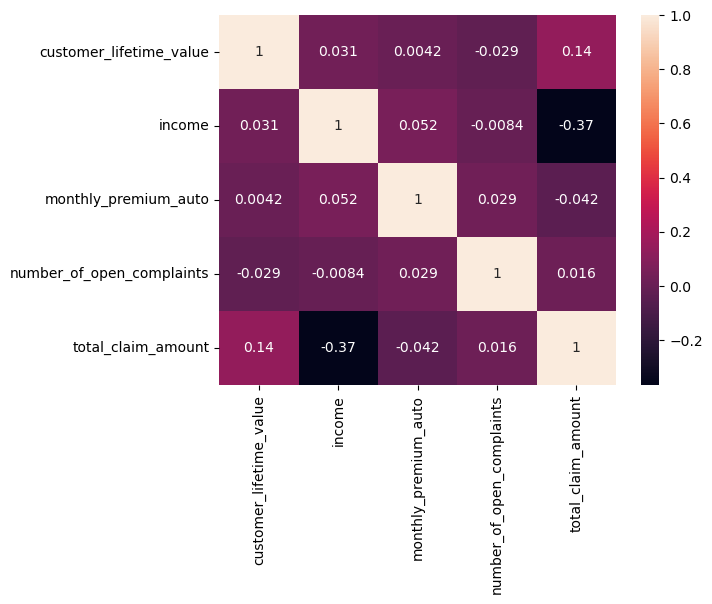

In [66]:
#Drop one of the two features that show a high correlation between them (greater than 0.9). 
#Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features
sns.heatmap(correlations_matrix, annot=True)
plt.show()
# there is no two features that show a high correlation between them(greater than 0.9), therefore do not drop any features

# Round 5



X-y split.

Scaling (numerical).


In [69]:
# X-y split 
y = n_df['total_claim_amount']
X = n_df_num.drop(['total_claim_amount'], axis = 1)
X

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints
0,6979.5359,0.0,94.0,0
1,12887.4317,48767.0,108.0,0
2,7645.8618,0.0,106.0,0
3,5363.0765,36357.0,68.0,0
4,8256.2978,62902.0,69.0,0
...,...,...,...,...
947,3059.5503,38644.0,78.0,1
948,20314.9976,63209.0,102.0,2
949,3239.1247,16061.0,88.0,0
950,4626.8011,79487.0,114.0,0


In [72]:
# Scaling (numerical) - normalizing data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

transformer = MinMaxScaler().fit(X)
x_normalized = transformer.transform(X)
print(x_normalized.shape)
x_normalized
df_norm = pd.DataFrame(x_normalized, columns = X.columns)
df_norm

(952, 4)


,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints
0,0.116267,0.000000,0.000935,0.0
1,0.254330,0.487865,0.001332,0.0
2,0.131838,0.000000,0.001275,0.0
3,0.078491,0.363715,0.000198,0.0
4,0.146104,0.629272,0.000227,0.0
...,...,...,...,...
947,0.024659,0.386595,0.000482,0.2
948,0.427908,0.632343,0.001162,0.4
949,0.028856,0.160674,0.000765,0.0
950,0.061285,0.795188,0.001502,0.0


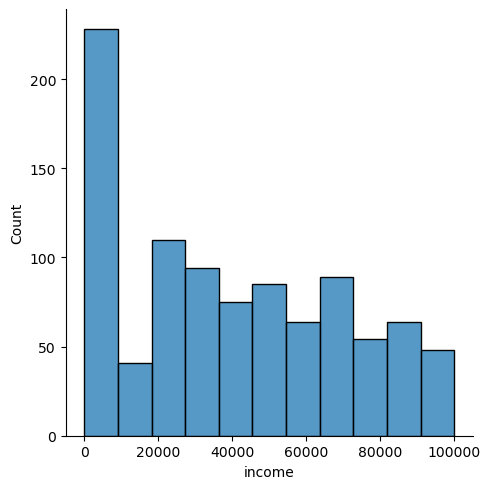

In [74]:
sns.displot(n_df['income'])
plt.show()

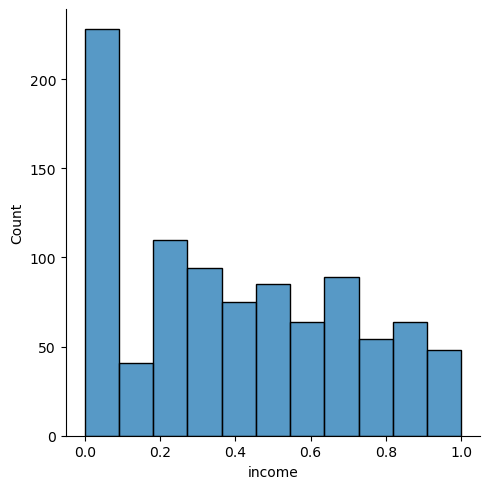

In [75]:
sns.displot(df_norm['income'])
plt.show()

In [73]:
# Scaling (numerical) - normalizing data using StandardScaler

transformer = StandardScaler().fit(X)
x_standardized = transformer.transform(X)
print(x_standardized.shape)
x_standardized
df_std = pd.DataFrame(x_normalized, columns = X.columns)
df_std

(952, 4)


,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints
0,0.116267,0.000000,0.000935,0.0
1,0.254330,0.487865,0.001332,0.0
2,0.131838,0.000000,0.001275,0.0
3,0.078491,0.363715,0.000198,0.0
4,0.146104,0.629272,0.000227,0.0
...,...,...,...,...
947,0.024659,0.386595,0.000482,0.2
948,0.427908,0.632343,0.001162,0.4
949,0.028856,0.160674,0.000765,0.0
950,0.061285,0.795188,0.001502,0.0


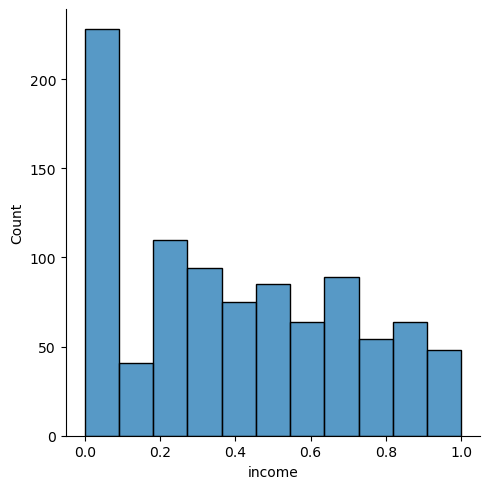

In [76]:
sns.displot(df_std['income'])
plt.show()